In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# deterministic evolution
def evolve(q, p, W, r1, r2, T):
    p_new = q*(r1 + (1.-r1)*(W@p-T>0.))
    q_new = q + r2*(1.-q-p) - p_new
    
    return p_new, q_new

# Homogeneous case

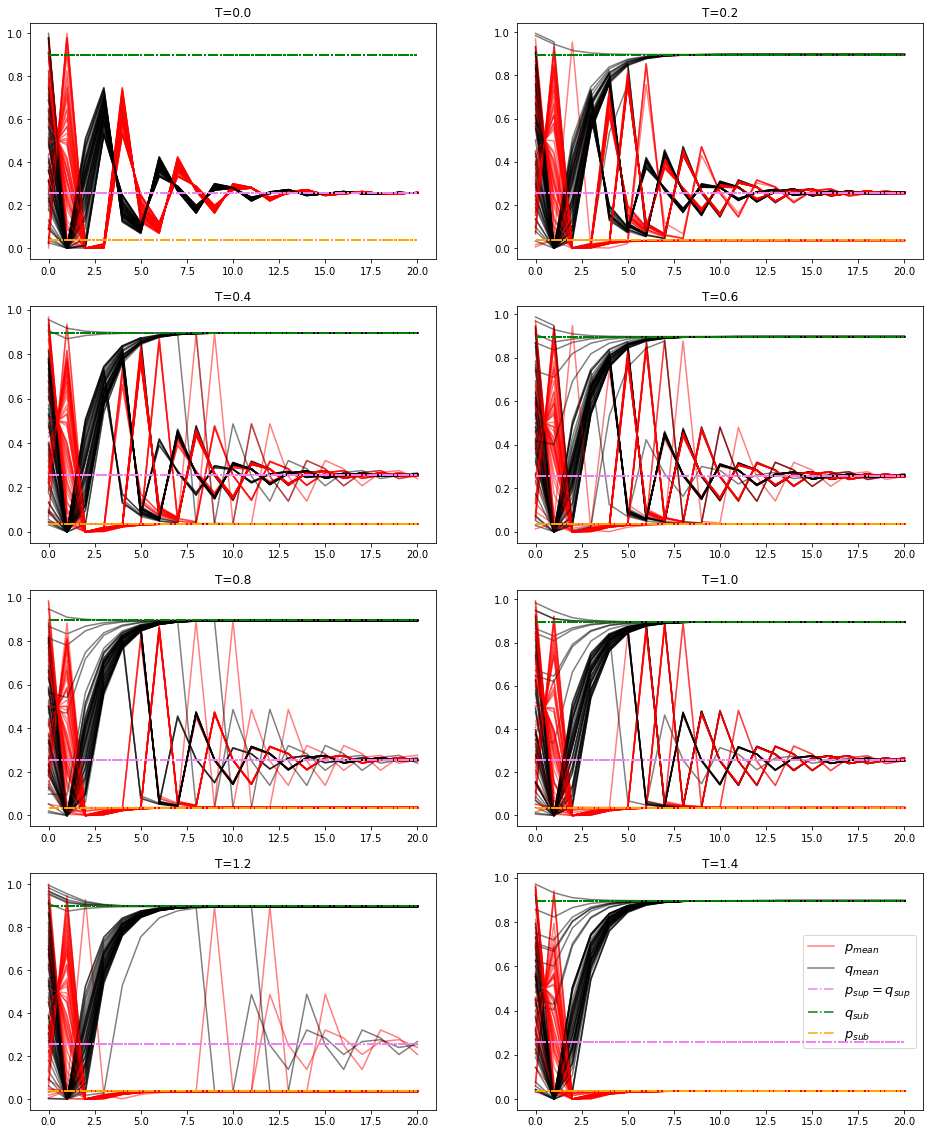

In [3]:
N = 50
ts = 20
runs = 50

r1 = 2./N
r2 = r1**(1./5.)
Tc = r2/(1.+2.*r2)
Tc = 1.
    
q_sup = r2/(1.+2.*r2)
p_sup = q_sup
    
q_sub = r2/(r1+r2 + r1*r2)
p_sub = r1 * q_sub

Ts = np.arange(0.0, 1.5, 0.2)#*Tc

plt.figure(figsize=(16,20))
for x,T in enumerate(Ts):
    plt.subplot(len(Ts)//2,2,x+1)

    for i in range(runs):
        
        W = np.random.random(1)*30
        
        p = np.zeros((ts+1, 1))
        q = np.zeros((ts+1, 1))
        
        # initial condition
        p[0] = np.random.random(1)
        q[0] = 1 - p[0]

        for t in range(ts):
            p[t+1], q[t+1] = evolve(q[t], p[t], W, r1, r2, T)

        if i==0:
            plt.plot(range(ts+1), p, alpha=0.5, c='r', label=r'$p_{mean}$')
            plt.plot(range(ts+1), q, alpha=0.5, c='k', label=r'$q_{mean}$')
            plt.hlines(p_sup, 0, ts, colors='violet', linestyles='dashdot', zorder=100, label=r'$p_{sup}=q_{sup}$')
            plt.hlines(q_sub, 0, ts, colors='green', linestyles='dashdot', zorder=100,  label=r'$q_{sub}$')
            plt.hlines(p_sub, 0, ts, colors='orange', linestyles='dashdot', zorder=100,  label=r'$p_{sub}$')
        else:
            plt.plot(range(ts+1), p, alpha=0.5, c='r')
            plt.plot(range(ts+1), q, alpha=0.5, c='k')
            plt.hlines(p_sup, 0, ts, colors='violet', linestyles='dashdot', zorder=100)
            plt.hlines(q_sub, 0, ts, colors='green', linestyles='dashdot', zorder=100)
            plt.hlines(p_sub, 0, ts, colors='orange', linestyles='dashdot', zorder=100)
        
    plt.title('T='+str(np.round(T/Tc,1)))
    if x==len(Ts)-1:
        plt.legend(prop={'size': 13})
#plt.tight_layout()
plt.show()

# Inhomogeneous case

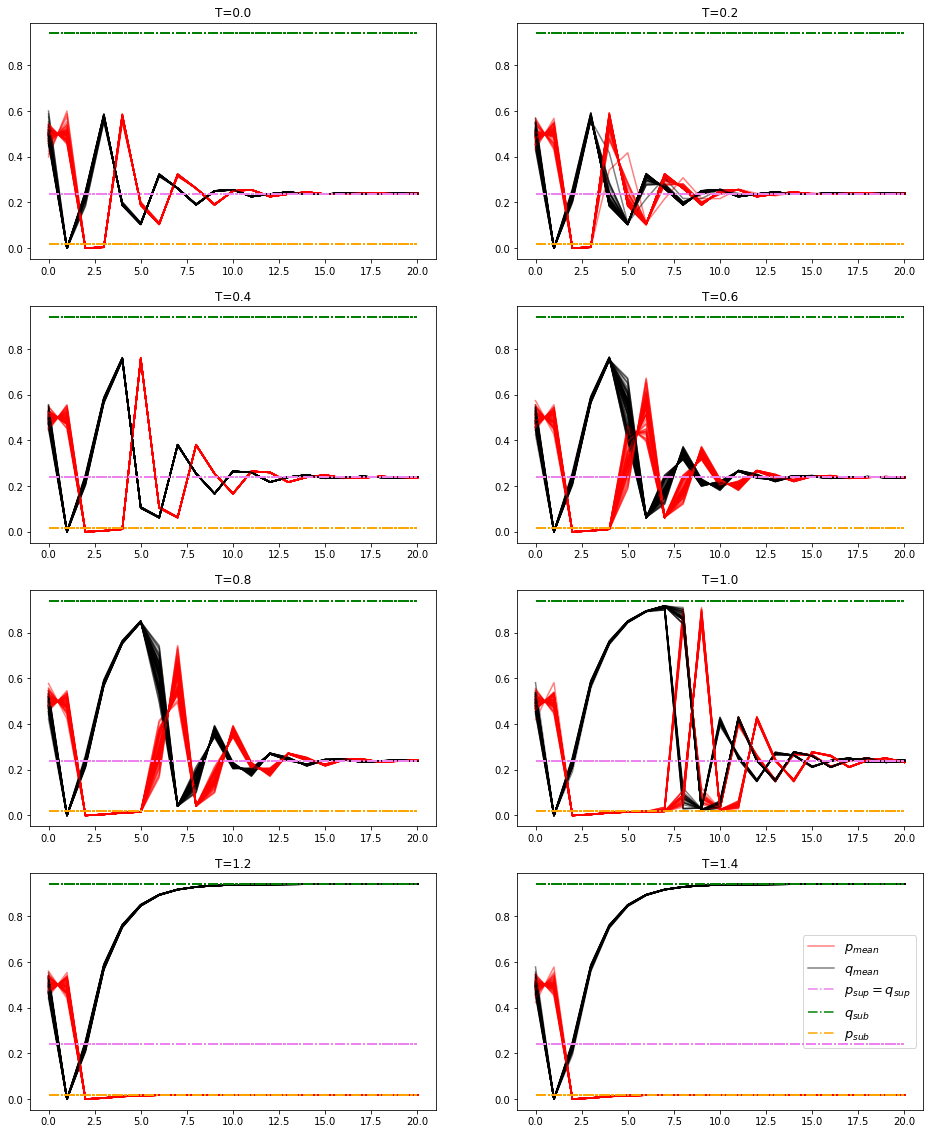

In [4]:
N = 100
ts = 20
runs = 50

r1 = 2./N
r2 = r1**(1./5.)
Tc = r2/(1.+2.*r2)
Tc = 1.
    
q_sup = r2/(1.+2.*r2)
p_sup = q_sup
    
q_sub = r2/(r1+r2 + r1*r2)
p_sub = r1 * q_sub

Ts = np.arange(0.0, 1.5, 0.2)#*Tc

plt.figure(figsize=(16,20))
for x,T in enumerate(Ts):
    plt.subplot(len(Ts)//2,2,x+1)

    for i in range(runs):
        W = np.random.random((N,N)) #*0.3
        W = np.triu(W,-1) + np.triu(W,-1).T
        #W = W / np.sum(W, axis=1)[:,None]
        
        p = np.zeros((ts+1, N))
        q = np.zeros((ts+1, N))
        
        # initial condition
        eps = np.random.random(1)
        p[0] = np.random.random(N) #* eps
        q[0] = 1 - p[0]

        for t in range(ts):
            p[t+1], q[t+1] = evolve(q[t], p[t], W, r1, r2, T)

        if i==0:
            plt.plot(range(ts+1), np.mean(p, axis=1), alpha=0.5, c='r', label=r'$p_{mean}$')
            plt.plot(range(ts+1), np.mean(q, axis=1), alpha=0.5, c='k', label=r'$q_{mean}$')
            plt.hlines(p_sup, 0, ts, colors='violet', linestyles='dashdot', zorder=100, label=r'$p_{sup}=q_{sup}$')
            plt.hlines(q_sub, 0, ts, colors='green', linestyles='dashdot', zorder=100,  label=r'$q_{sub}$')
            plt.hlines(p_sub, 0, ts, colors='orange', linestyles='dashdot', zorder=100,  label=r'$p_{sub}$')
        else:
            plt.plot(range(ts+1), np.mean(p, axis=1), alpha=0.5, c='r')
            plt.plot(range(ts+1), np.mean(q, axis=1), alpha=0.5, c='k')
            plt.hlines(p_sup, 0, ts, colors='violet', linestyles='dashdot', zorder=100)
            plt.hlines(q_sub, 0, ts, colors='green', linestyles='dashdot', zorder=100)
            plt.hlines(p_sub, 0, ts, colors='orange', linestyles='dashdot', zorder=100)
        
    plt.title('T='+str(np.round(T/Tc,1)))
    if x==len(Ts)-1:
        plt.legend(prop={'size': 13})
#plt.tight_layout()
plt.show()

# Check computationally the nature of the stable points in the sub-critical phase

In [5]:
def isOsc(N):
    r1 = 2/N
    r2 = r1**(1/5)
    
    if r1 - np.sqrt(r1) + 1 < r2:
        return True
    else:
        return False

In [6]:
osc = []

for N in range(1,1000):
    osc.append(isOsc(N))

In [7]:
np.where(osc)

(array([2, 3, 4, 5, 6, 7]),)